<a href="https://colab.research.google.com/github/bigirimanainnocent12/Regression_logistique/blob/main/Regression_logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Contexte***

Bob a lancé sa propre entreprise de téléphonie mobile. Il veut livrer une bataille acharnée aux grandes entreprises comme Apple, Samsung, etc.

Il ne sait pas comment estimer le prix des téléphones portables que son entreprise fabrique. Dans ce marché concurrentiel de la téléphonie mobile, on ne peut pas simplement faire des suppositions. Pour résoudre ce problème, il collecte des données sur les ventes de téléphones portables de différentes entreprises.

Bob souhaite découvrir une relation entre les caractéristiques d'un téléphone portable (par exemple : RAM, mémoire interne, etc.) et son prix de vente. Mais il n'est pas très doué en apprentissage automatique. Il a donc besoin de votre aide pour résoudre ce problème.

Dans ce problème, vous n'avez pas à prédire le prix réel mais une fourchette de prix indiquant à quel point le prix est élevé.


[Lien de la base de données](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)


# ***Description de base de données***


La base de données contient 21 variables:

1. battery_power:Énergie totale qu'une batterie peut stocker en une seule fois, mesurée en mAh (Quanitative);

2. blue: A le Bluetooth ou pas (binaire):

- 1= Le téléphone posséde un Bluetooth

- 0= Le téléphone ne posséde pas un Bluetooth

3. clock_speed: vitesse à laquelle le microprocesseur exécute les instructions (quantitative);

4. dual_sim: Prend en charge la double carte SIM ou non (binaire):

- 1= Le téléphone prend en charge la double carte SIM

- 0= Le téléphone ne prend pas en charge la double carte SIM

5. fc: Mégapixels de la caméra frontale(quantitative);

6. four_g: A la 4G ou pas(binaire):

- 1= Le téléphone a la 4G

- 0= Le téléphone n'a pas la 4G

7. int_memory:Mémoire interne en gigaoctets (quantitative);

8. m_dep: Profondeur du mobile en cm (quantitative);

9. mobile_Wt: Poids du téléphone portable (quantitative);

10. n_cores: Nombre de cœurs du processeur (quantitative);

11. pc: Mégapixels de l'appareil photo principal (quantitative);

12. px_height: Résolution en pixels Hauteur (quantitative);

13. px_width: Largeur de résolution en pixels (quantitative);

14. ram: Mémoire à accès aléatoire en mégaoctets (quantitative);

15. sc_h: Hauteur de l'écran du mobile en cm (quantitative);

16. sc_w: Largeur de l'écran du mobile en cm (quantitative);

17. talk_time: la durée la plus longue pendant laquelle une seule charge de batterie durera (quantitative);

18. three_g: A la 3G ou pas (binaire):

- 1= Le téléphone a la 3G

- 0= Le téléphone n'a pas la 3G

19. touch_creen: Avec écran tactile ou non (binaire):

- 1= Le téléphone a l'écran tactile

- 0= Le téléphone n'a pas l'écran tactile

20. wifi: A le wifi ou pas (binaire):

- 1= Le téléphone a le wifi

- 0= Le téléphone n'a pas le wifi

21. price_range (qualitative):

- 0 : Bas de gamme -Représente les téléphones avec un prix faible.

- 1 : Moyen de gamme inférieur - Représente des téléphones dans une fourchette de prix intermédiaire, mais encore abordables.

- 2 : Moyen de gamme supérieur - Représente des téléphones avec un prix un peu plus élevé, offrant des spécifications plus avancées que les téléphones précédents, mais restant inférieurs aux modèles haut de gamme.

- 3 : Haut de gamme - Représente les téléphones dans une fourchette de prix élevée. Ces appareils possèdent généralement des caractéristiques avancées (RAM élevée, espace de stockage plus grand, meilleures fonctionnalités), et visent des utilisateurs prêts à payer pour des performances élevées.

# ***Modèle***

Régression logistique






# **Importattion de la base de données**

In [ ]:
import kagglehub
import pandas as pd
import os


chemin = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", chemin)


for filename in os.listdir(chemin):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(chemin, filename)
        break


DF = pd.read_csv(csv_file_path)
DF.head()

100%|██████████| 70.6k/70.6k [00:00<00:00, 509kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Variable_qualitative=DF[['three_g','touch_screen','wifi','dual_sim','blue']].astype('bool')
Variable_quantitatives=DF[['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']]

In [ ]:
x=pd.concat([Variable_qualitative,Variable_quantitatives],axis=1)
y=DF['price_range'].astype('category')

# **Séparation de la base de données en deux ensembles:**

- Un ensemble pour l'entraînement

- Un ensemble pour le test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# **Entraînement du modèle**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  GridSearchCV


preprocessor = ColumnTransformer(transformers=[
    ('Variables quantitatives', StandardScaler(), x.select_dtypes(include=['float64','int64']).columns),
    ('Variables qualitatives', 'passthrough', x.select_dtypes(include=['bool']).columns)
])





model = make_pipeline(
    preprocessor,
    LogisticRegression(max_iter=50000)
)


param_grid = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__solver': ['liblinear', 'saga']
}

grid_model = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


grid_model.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Variables '
                                                                         'quantitatives',
                                                                         StandardScaler(),
                                                                         Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')),
                                                                        ('Variables '
                                                                         'qualitatives',
                                                                         'passthrough',
                                                                         Index(['three_g', 'touch_screen', 'wifi', 'dual_sim', 'blue'], dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=50000))]),
             param_grid={'logisticregression__C': [0.1, 1, 10],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['liblinear', 'saga']},
             scoring='neg_mean_squared_error')

# **Coefficients du modèle**

# **Prédiction**

In [ ]:
prediction=grid_model.best_estimator_.predict(x_test)

# **Évaluation du modèle**

# **Histogramme des probabilités des prédictions**

<Axes: ylabel='Count'>

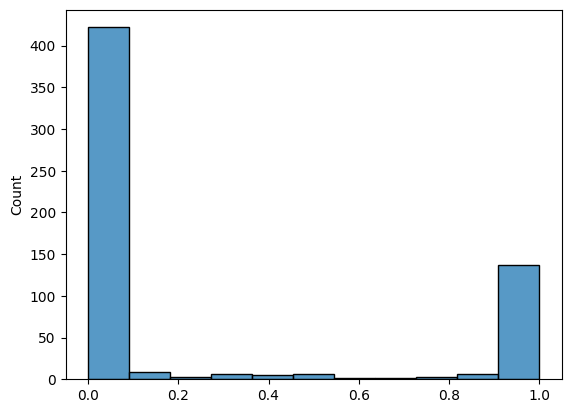

In [ ]:
y_hat_proba = grid_model.best_estimator_.predict_proba(x_test)[:,1]
import seaborn as sns
sns.histplot(y_hat_proba)

Le modèle est assez fiable au niveau de ses prédictions, la plupart des prédictions ont une probabilité proche de 0 ou de 1.

# **L'exactitude du modèle**

In [ ]:
from sklearn.metrics import accuracy_score
print(f"L'exactitude du modèle est de {round(accuracy_score(y_test,prediction)*100,2)}%")

L'exactitude du modèle est de 97.67%


# **Précision du modèle**

In [ ]:
from sklearn.metrics import precision_score
print(f"La précision du modèle est de {round(precision_score(y_test,prediction,average='weighted')*100,2)}%")

La précision du modèle est de 97.7%


# **La sensibilité du modèle**

In [ ]:
from sklearn.metrics import recall_score
print(f"La sensibilité du modèle est de {round(recall_score(y_test,prediction,average='weighted')*100,2)}%")

La sensibilité du modèle est de 97.67%


# **Matrice de confusion**

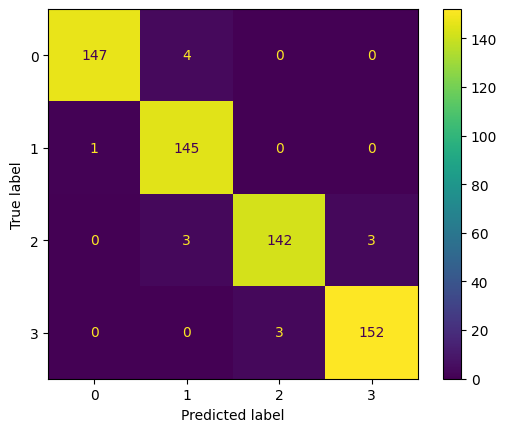

In [ ]:
from sklearn.metrics import  ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(grid_model.best_estimator_,x_test,y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(f"Rapport de classification:\n{classification_report(y_test,prediction)}")

Rapport de classification:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.95      0.99      0.97       146
           2       0.98      0.96      0.97       148
           3       0.98      0.98      0.98       155

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



# **Aire sous la courbe ROC**

In [ ]:
from sklearn.metrics import  roc_auc_score
y_score = grid_model.best_estimator_.predict_proba(x_test)
print(f" L'aire sous la courbe ROC:{roc_auc_score(y_test,y_score,multi_class='ovr')}. Un score de 1 signifie une séparation parfaite entre les classes")


 L'aire sous la courbe ROC:0.999342153664084. Un score de 1 signifie une séparation parfaite entre les classes


Plus le score est proche de 1, meilleure est la performance de notre modèle pour distinguer entre les classes.

# **Sauvegarder du modèle**

In [ ]:
import joblib

joblib.dump(grid_model.best_estimator_, 'modele.pkl')

['modele.pkl']